# Load Libraries

In [1]:
from matrixprofile import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ModuleNotFoundError: No module named 'matrixprofile'

# Create sample data

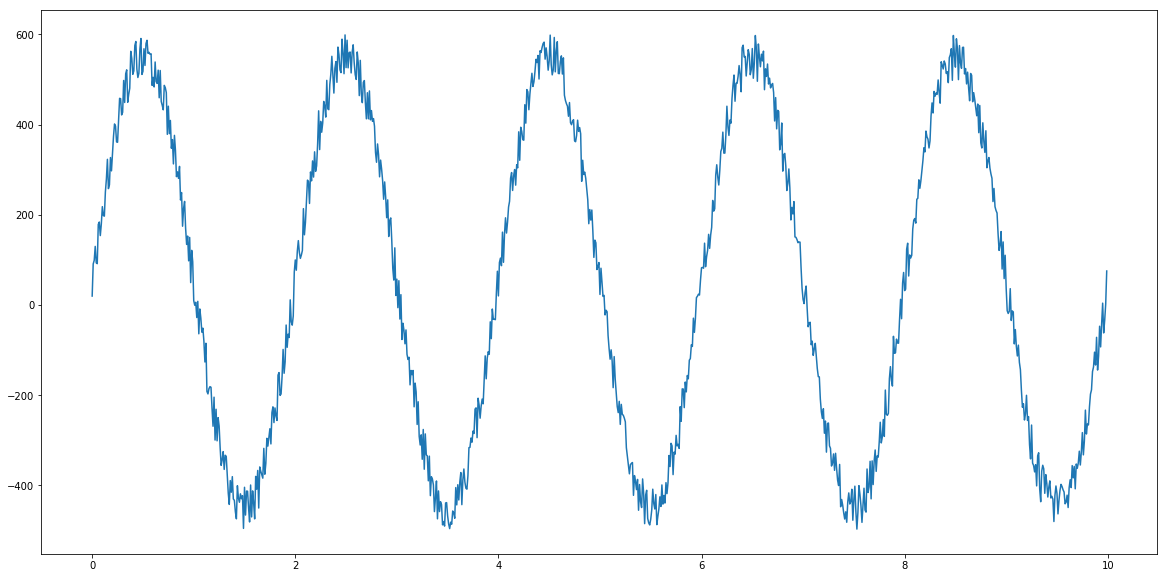

In [2]:
#Start with perfect, periodic data
steps = np.arange(0.0,10.0,0.01)
data = 500*np.sin(np.pi*steps) + 100*np.random.rand(1000)

fig, ax1 = plt.subplots(figsize=(20,10))
ax1.plot(steps,data)

# STMP: calculate the full matrix profile

In [3]:
##Note that, due to the nature of the matrix profiling algorithms, occasional invalid MASS values will occur.
##This is to be expected.

#Define the query window to be 80 time steps
m = 80
mp = stmp(data,m)

/Users/z002s6j/git/matrixprofile/docs/utils.py:83: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(2*(m-(dot/std)))


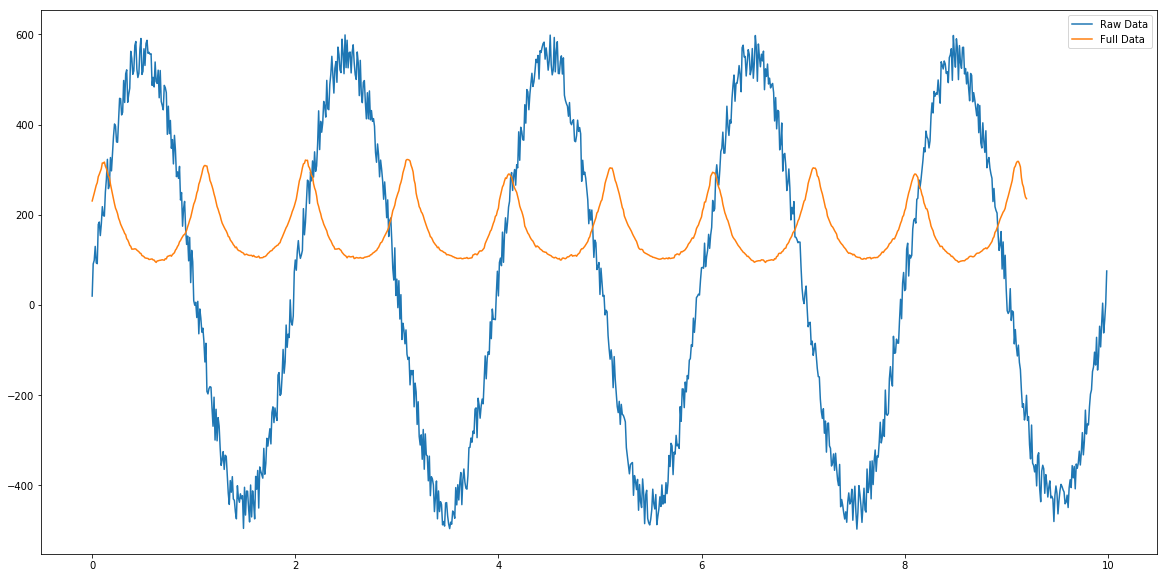

In [4]:
#Append np.nan to Matrix profile to enable plotting against raw data
mp_adjusted = np.append(mp[0],np.zeros(m-1)+np.nan)


#Plot the data
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.plot(steps,data, label = "Raw Data")

#Note that, due to the normalization step we've implemented in the MASS calculation, matrix profile values are
#much closer together than before. Thus, it helps to include a scaling factor to highlight difference
ax1.plot(steps,100*mp_adjusted, label = "Full Data")

legend = ax1.legend(loc='upper right')

# STAMP: calculate the anytime matrix profile

In [5]:
#Define the query window to be 80 time steps. Here we decide to sample 20% of the full matrix profile
m = 80
mp_sample = stamp(data,m,sampling=0.2)

/Users/z002s6j/git/matrixprofile/docs/utils.py:83: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(2*(m-(dot/std)))


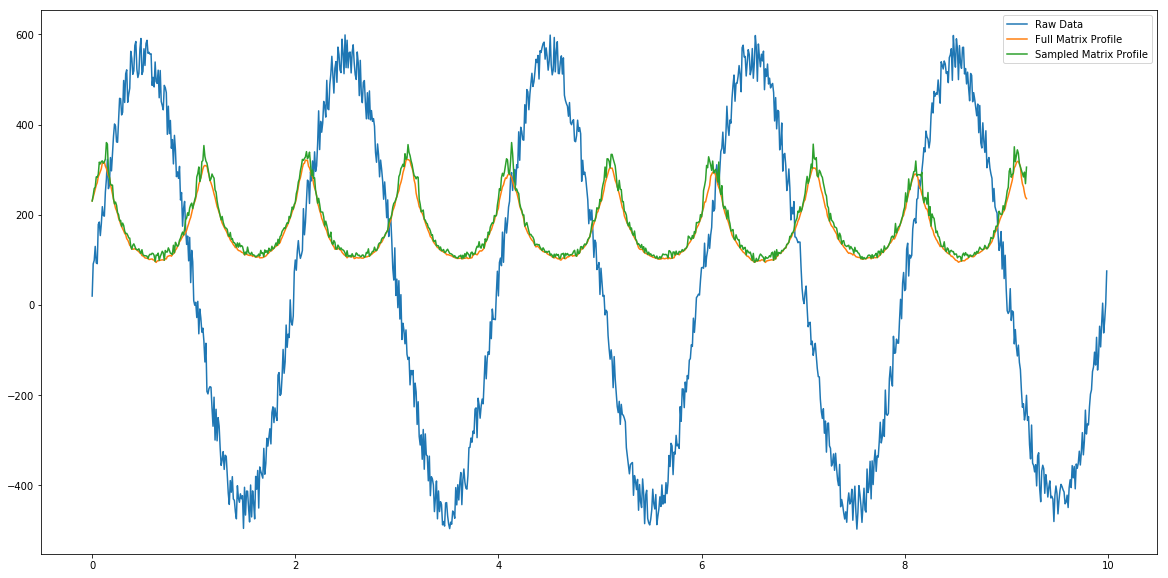

In [6]:
#Append np.nan to Matrix profile to enable plotting against raw data
mp_adjusted_sample = np.append(mp_sample[0],np.zeros(m-1)+np.nan)


#Plot the data
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.plot(steps,data, label="Raw Data")

#Plot the full matrix profile
ax1.plot(steps,100*mp_adjusted, label="Full Matrix Profile")

#Plot the sampled matrix profile
ax1.plot(steps,100*mp_adjusted_sample, label="Sampled Matrix Profile")

legend = ax1.legend(loc='upper right')

# STAMPI: detect an anomalous datapoint

In [7]:
#Now that we have our base dataset, let's add an anomaly to the very next time step and use STAMPI to detect it
mp_new = stampi_update(data,m,mp[0],mp[1],newval=-500.0)

/Users/z002s6j/git/matrixprofile/docs/utils.py:83: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(2*(m-(dot/std)))


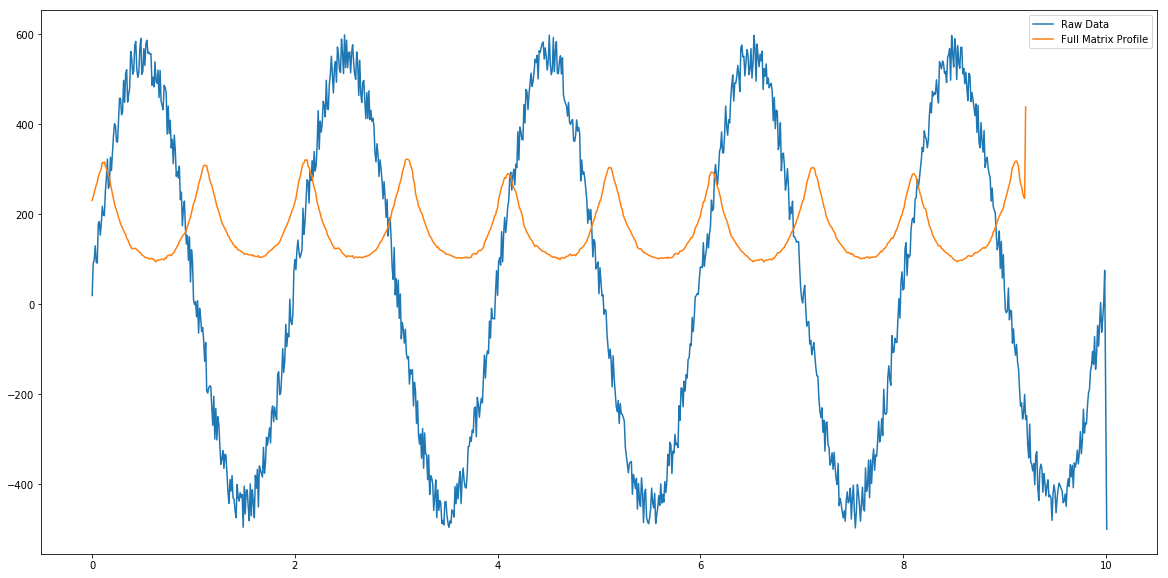

In [8]:
#Add the new datapoint to the original data set
steps = np.append(steps,10.01)
data = np.append(data,-500.0)

#Append np.nan to Matrix profile to enable plotting against raw data
mp_adjusted = np.append(mp_new[0],np.zeros(m-1)+np.nan)


#Plot the data and resulting matrix profile
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.plot(steps,data, label = "Raw Data")

ax1.plot(steps,100*mp_adjusted, label = "Full Matrix Profile")

legend = ax1.legend(loc='upper right')

Note how STAMPI has found the anomaly: the matrix profile has spiked up at the end instead of continuing on its (expected) downward trend